In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score



In [32]:
data = pd.read_csv('suv_data.csv')

print(data.head(10))



    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


In [34]:
data.info


<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [35]:
print("Number of Customers " , len(data))



Number of Customers  400


In [36]:
#Preprocesisng

Gender = pd.get_dummies(data['Gender'] , drop_first = True)
print(Gender.head(5))



   Male
0     1
1     1
2     0
3     0
4     1


In [37]:
data = pd.concat([data , Gender] , axis = 1)

print(data.head(5))



    User ID  Gender  Age  EstimatedSalary  Purchased  Male
0  15624510    Male   19            19000          0     1
1  15810944    Male   35            20000          0     1
2  15668575  Female   26            43000          0     0
3  15603246  Female   27            57000          0     0
4  15804002    Male   19            76000          0     1


In [38]:
#Dropping User ID and gender column


data.drop(['User ID' , 'Gender' ]  ,axis = 1 , inplace = True)

print(data.head(5))



   Age  EstimatedSalary  Purchased  Male
0   19            19000          0     1
1   35            20000          0     1
2   26            43000          0     0
3   27            57000          0     0
4   19            76000          0     1


In [40]:
#Dependent and independent Variable

X = data.drop('Purchased'  , axis = 1)

y = data['Purchased']






In [62]:
#Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)



In [63]:
sc = StandardScaler()



X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)



In [64]:
#Define the Model

model = LogisticRegression(solver = 'liblinear')

In [65]:
#Fit Model

model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [66]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='liblinear')

In [67]:
#Predictions:--
predictions = model.predict(X_test)
print(predictions)

[0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0]


In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



In [69]:
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))

Confusion Matrix: 
 [[40  8]
 [ 6 26]]


In [70]:
print("Accuracy: ",accuracy_score(y_test, predictions))

Accuracy:  0.825


C:\Users\hjha0\AppData\Local\Temp\ipykernel_8504\1975600989.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Purchased']==1]['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

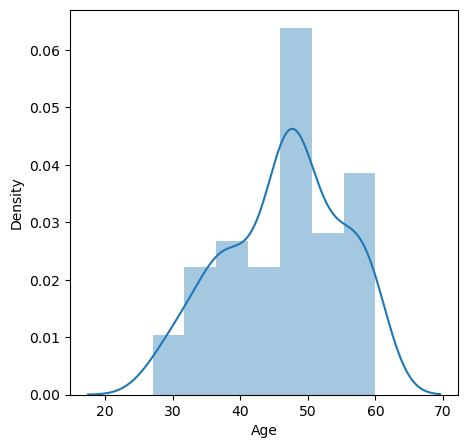

In [71]:
#Customers who purchased the SUV based on Age
plt.figure(figsize = (5,5))
sns.distplot(data[data['Purchased']==1]['Age'])


<AxesSubplot:ylabel='Frequency'>

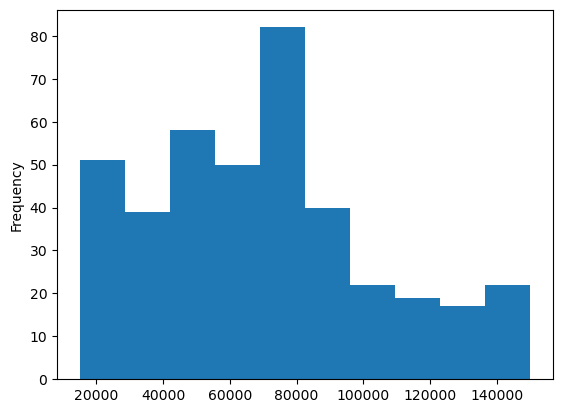

In [52]:
#Graph for Estimated Salary of Customers
data['EstimatedSalary'].plot.hist()




<AxesSubplot:ylabel='Frequency'>

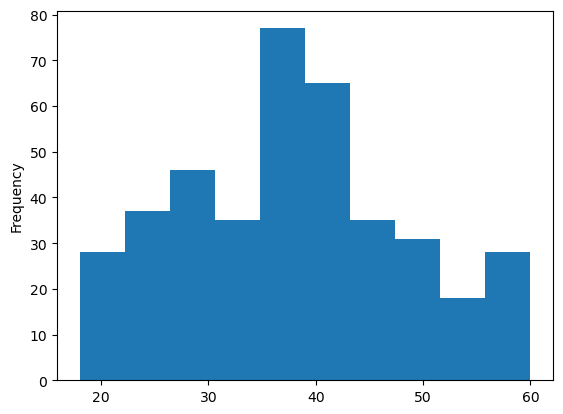

In [53]:
#Graph for age of customers
data['Age'].plot.hist()



<AxesSubplot:xlabel='Purchased', ylabel='count'>

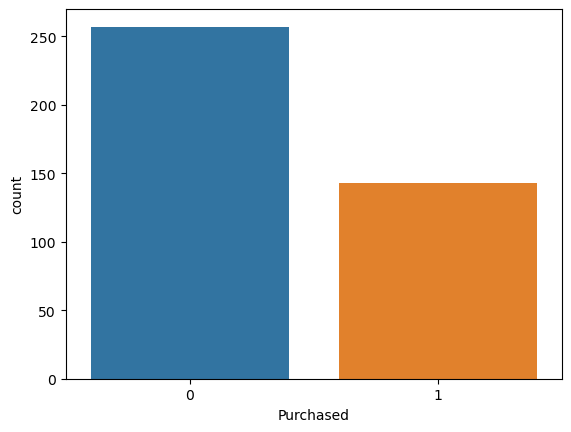

In [57]:
#Customer who Purchased the SUV car
sns.countplot(x='Purchased', data = data)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

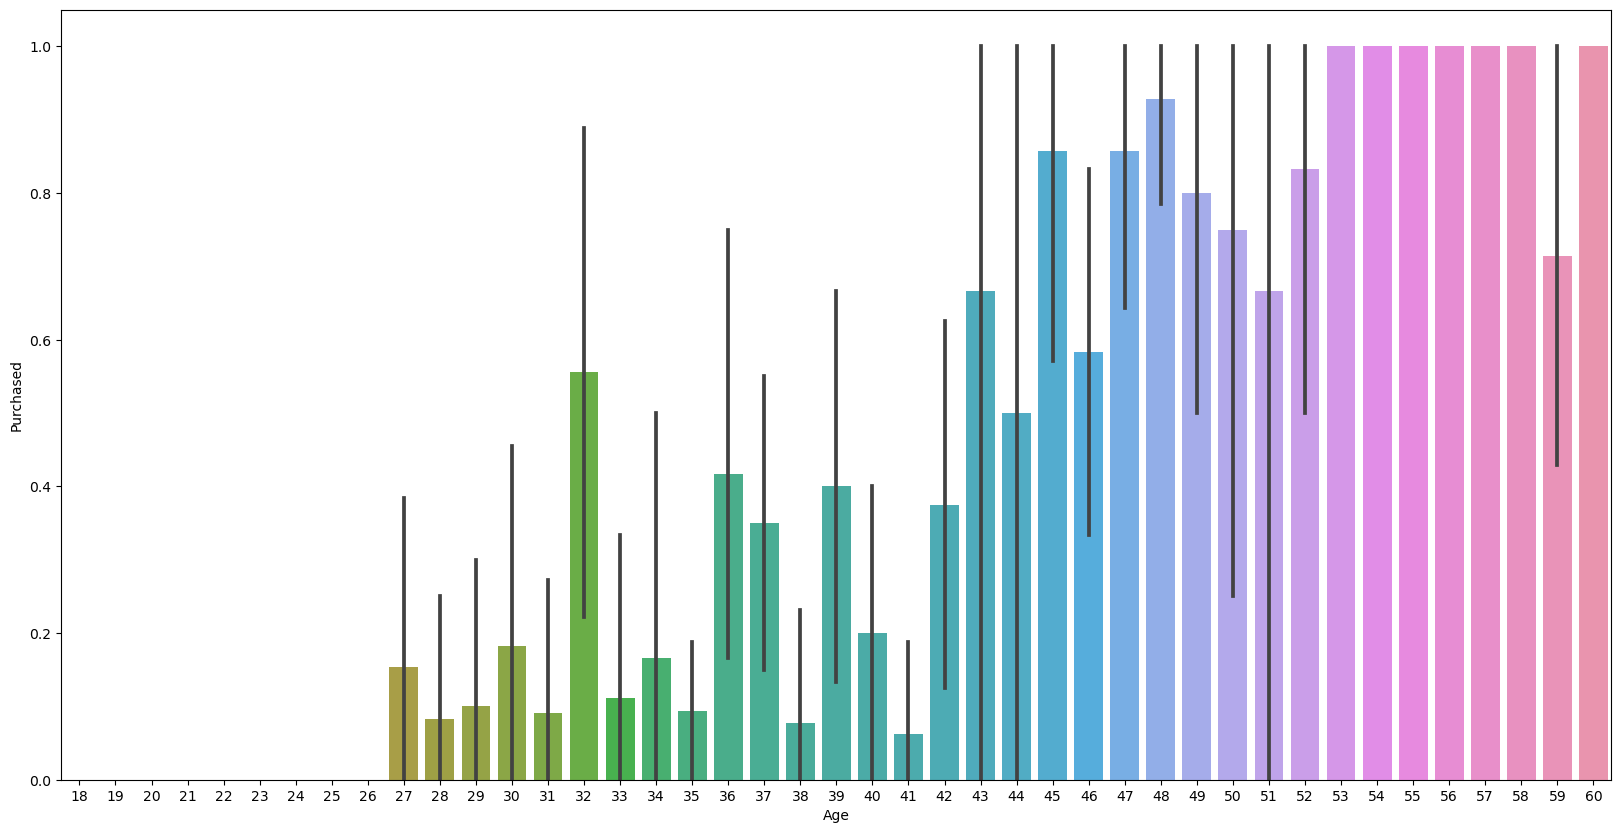

In [50]:
plt.figure(figsize = (20,10))
sns.barplot(x=data['Age'],y=data['Purchased'])